In [1]:
import matplotlib.pyplot as plt
import pandas as pd


def plotData(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    #to filter rows based on date range
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')

    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    

    if(name!="^VIX"):
        color = 'tab:red'
        ax1.set_xlabel('DATE', fontsize=18) 
        ax1.set_ylabel('VOLUME', color=color, fontsize=18)
        ax1.plot(stock_data['Volume'], color=color, linewidth=2) 
        ax1.grid(True)

    ax2 = ax1.twinx() 
    color = 'tab:blue'
    ax2.set_ylabel('ADJUSTED CLOSE PRICE', color=color, fontsize=18) 
    ax2.plot(stock_data['Adj Close'], color=color, linewidth=2) 
    plt.title('Volume and ADJUSTED CLOSE PRICE of '+name+'. ['+starttime+' to '+endtime+']\n', fontsize=20, color='black')
    plt.show()
    






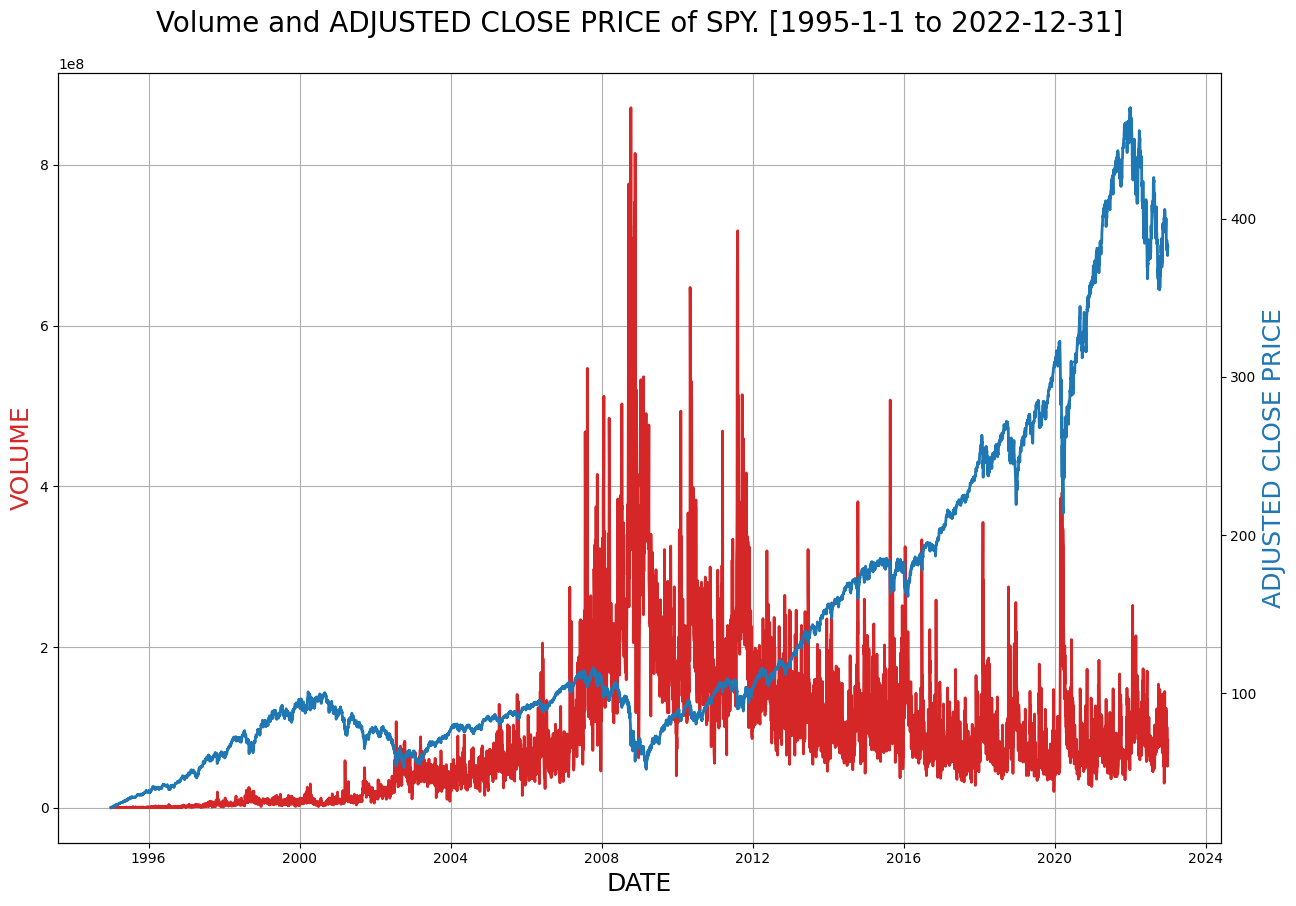

In [2]:
plotData("SPY",'1995-1-1','2022-12-31')

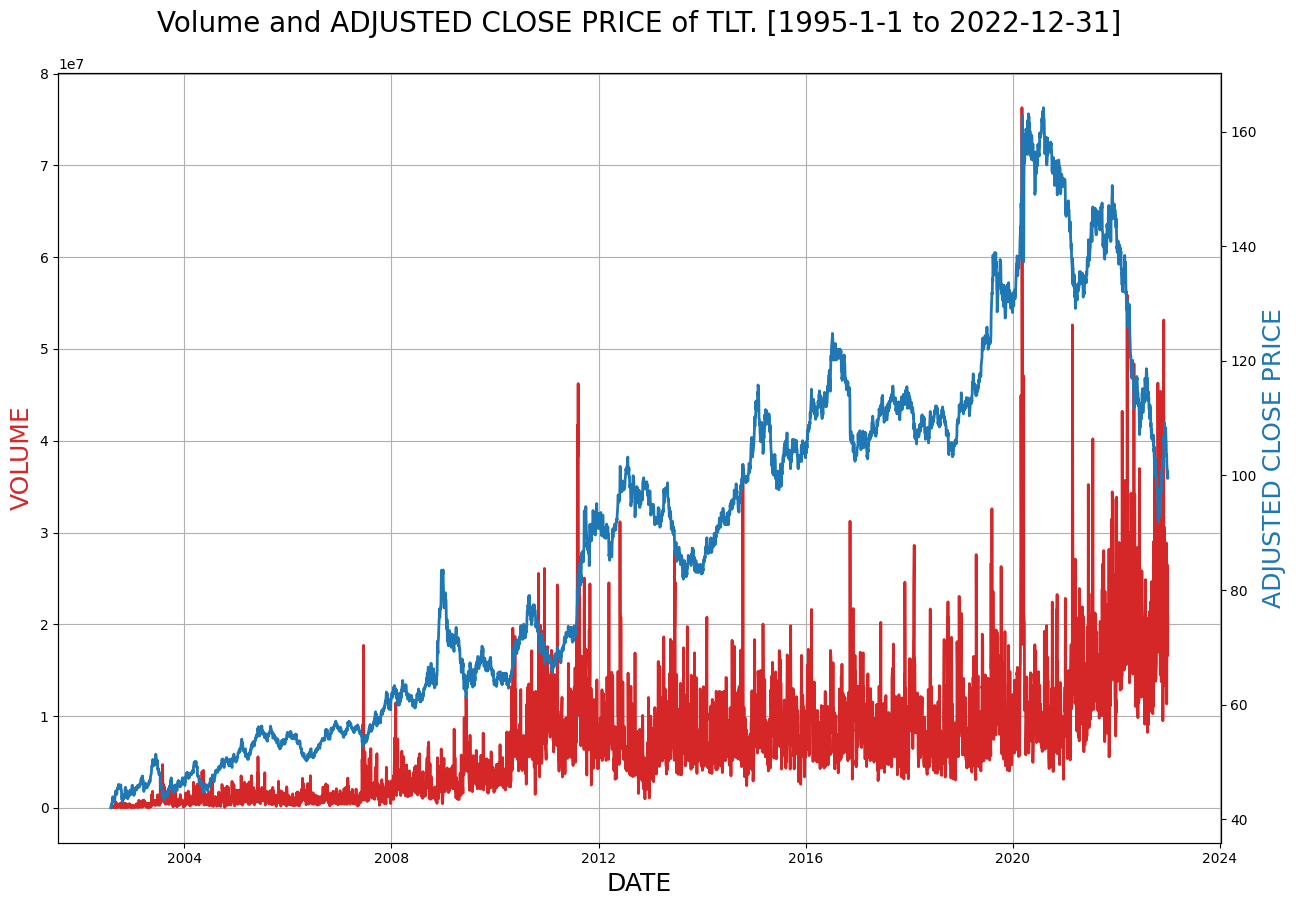

In [3]:
plotData("TLT",'1995-1-1','2022-12-31')

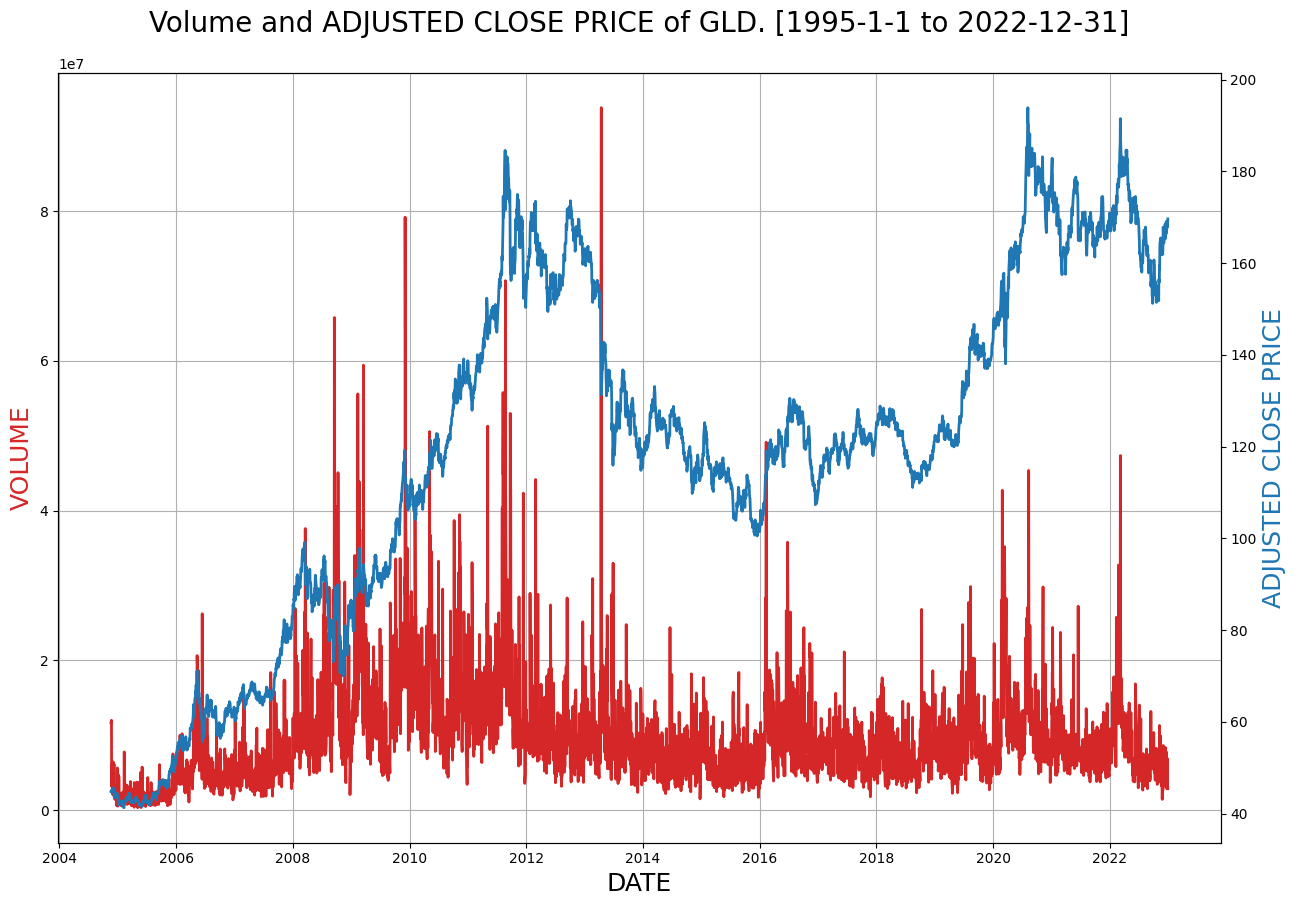

In [4]:
plotData("GLD",'1995-1-1','2022-12-31')

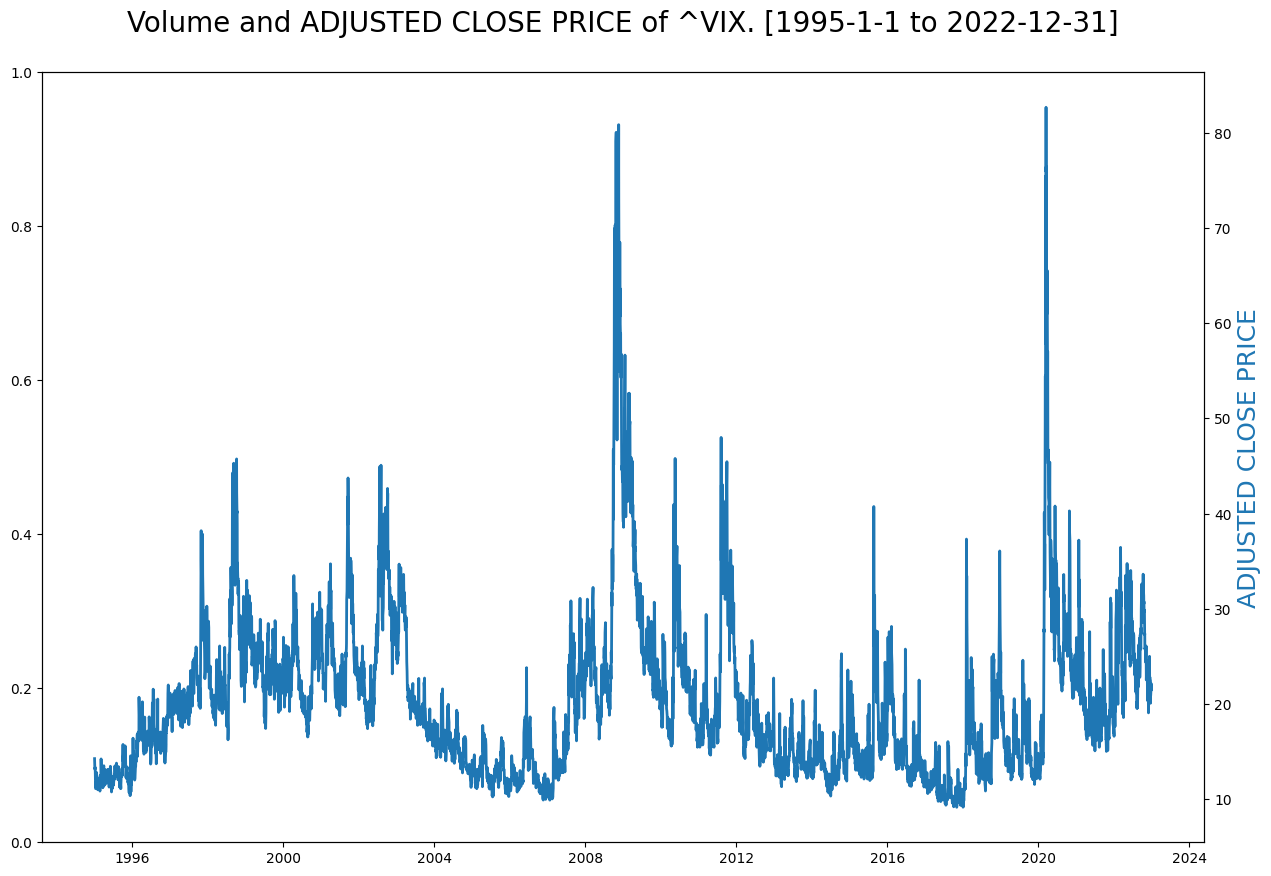

In [5]:
plotData("^VIX",'1995-1-1','2022-12-31')

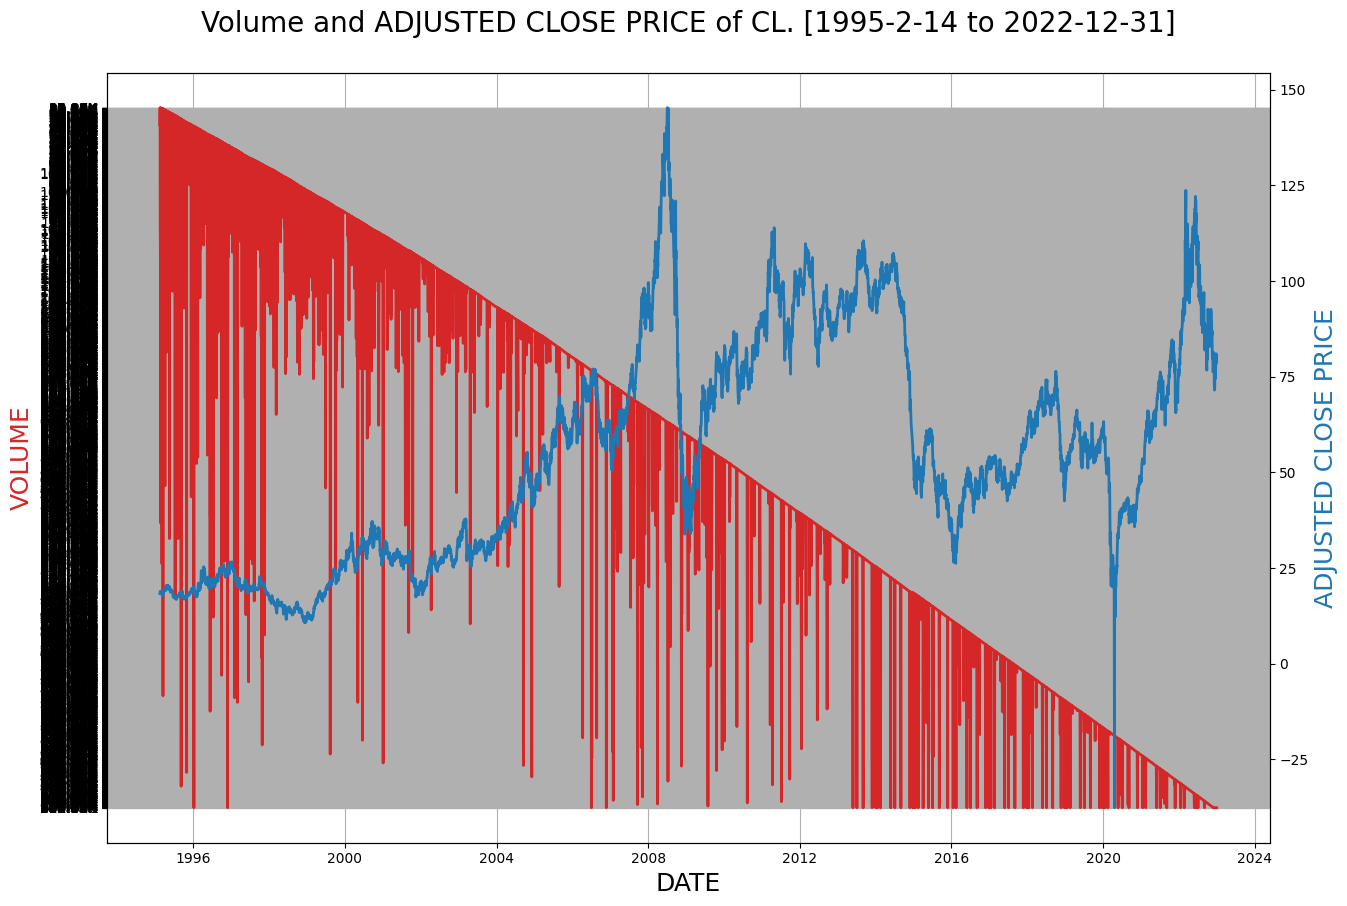

In [6]:
plotData("CL",'1995-2-14','2022-12-31')

In [7]:
def MAX(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    
    maximum_value=max(stock_data['High'])
    print(maximum_value)
    
MAX("SPY",'1995-2-15','2022-12-31')
MAX("TLT",'1995-2-15','2022-12-31')
MAX("GLD",'1995-2-15','2022-12-31')
MAX("^VIX",'1995-2-15','2022-12-31')
MAX("CL",'1995-2-15','2022-12-31')    

479.980011
179.699997
194.449997
89.529999
147.27


In [8]:
def MIN(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    
    minimum_value=min(stock_data['Low'])
    print(minimum_value)
    
MIN("SPY",'1995-1-1','2022-12-31')
MIN("TLT",'1995-1-1','2022-12-31')
MIN("GLD",'1995-1-1','2022-12-31')
MIN("^VIX",'1995-1-1','2022-12-31')
MIN("CL",'1995-2-15','2022-12-31')    

45.6875
80.510002
41.02
8.56
-40.32


In [9]:
def AVG(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    
    summ= sum(stock_data['Low'])
    
    length= len(stock_data['Low'])
    average=summ/length
    print(average)
    
AVG("SPY",'1995-1-1','2022-12-31')
AVG("TLT",'1995-1-1','2022-12-31')
AVG("GLD",'1995-1-1','2022-12-31')
AVG("^VIX",'1995-1-1','2022-12-31')
AVG("CL",'1995-2-15','2022-12-31') 

168.79070001205662
110.61727875510616
118.51090571250016
19.46257587815603
54.23098690694054


In [10]:
def MAX_DAILY_DRAWDOWN(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Low'])
    array=[]
    for i in range(length):
        rang= stock_data['High'][i]- stock_data['Low'][i]
        ranges= (rang/stock_data['High'][i])*100
        array.append(ranges)
    maxi=max(array)
    print("-"+str(maxi)+"%")
    
MAX_DAILY_DRAWDOWN("SPY",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("TLT",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("GLD",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("^VIX",'1995-1-1','2022-12-31')
MAX_DAILY_DRAWDOWN("CL",'1995-2-14','2022-12-31') 

-11.248151183979306%
-9.815754572568789%
-11.349895689048846%
-56.70103238920186%
-325.88235294117646%


<AxesSubplot: >

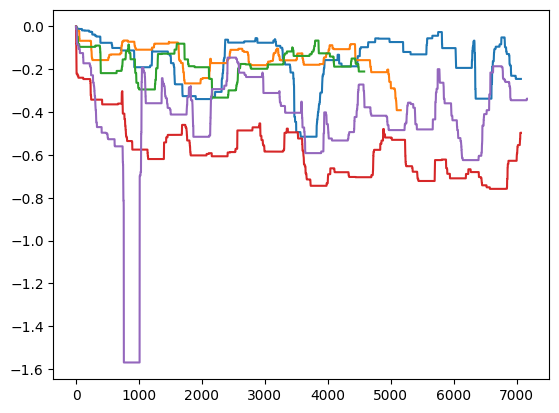

In [11]:
def drawdown(df, window=252):
    Roll_Max= df['Adj Close'].rolling(window, min_periods=1).max()
    Daily_Drawdown= df['Adj Close']/Roll_Max - 1.0
    Max_Daily_Drawdown= Daily_Drawdown.rolling(window,min_periods=1).min()
    
    return Max_Daily_Drawdown

drawdown(pd.read_csv("C:/Users/hsahn/Downloads/SPY.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/TLT.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/GLD.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/^VIX.csv")).plot()
drawdown(pd.read_csv("C:/Users/hsahn/Downloads/CL.csv")).plot()

In [12]:
def DRAWDOWN_PERCENT(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Low'])
    
    maximum_value=max(stock_data['High'])
    minimum_value=min(stock_data['Low'])
    
    percent=(minimum_value-maximum_value)/maximum_value *100
    print(percent)
    
    
    
DRAWDOWN_PERCENT("SPY",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("TLT",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("GLD",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("^VIX",'1995-1-1','2022-12-31')
DRAWDOWN_PERCENT("CL",'1995-2-14','2022-12-31') 

-90.48137444207025
-55.19754961375987
-78.90460240017386
-90.43895890136221
-127.37828478305153


In [13]:
def DRAWDOWN_DURATION(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Low'])
    
    maximum_value=max(stock_data['High'])
    minimum_value=min(stock_data['Low'])
    
    percent=(minimum_value-maximum_value)/maximum_value *100
    print(percent)
    
    
    
DRAWDOWN_DURATION("SPY",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("TLT",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("GLD",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("^VIX",'1995-1-1','2022-12-31')
DRAWDOWN_DURATION("CL",'1995-2-14','2022-12-31') 

-90.48137444207025
-55.19754961375987
-78.90460240017386
-90.43895890136221
-127.37828478305153


In [14]:
from datetime import date
def numOfDays(date1, date2):
    return (date2-date1).days

In [15]:
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
def DRAWDOWN_DURATION(name, starttime,endtime):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    start_date = pd.to_datetime(starttime)
    end_date = pd.to_datetime(endtime)   
    df['Date'] = pd.to_datetime(df['Date']) 
    new_df = (df['Date']>= start_date) & (df['Date']<= end_date)
    
    df1 = df.loc[new_df]
    stock_data = df1.set_index('Date')
    length= len(stock_data['Volume'])

    
    xs = stock_data['Adj Close']
    i = np.argmax(( np.maximum.accumulate(xs) - xs ) / np.maximum.accumulate(xs)) # end of the period
    j = np.argmax(xs[:i]) # start of period

    plt.plot(xs)
    plt.plot([i, j], [xs[i], xs[j]], 'o', color='Red', markersize=5)
    p=xs[i]
    q=xs[j]
    print(xs[i])
    print(xs[j])
        
    date1=xs[stock_data['Adj Close'] == p].index.tolist()[0]
    date2=xs[stock_data['Adj Close'] == q].index.tolist()[0]
    
    print(date1)
    print(date2)

    
    print(numOfDays(date2, date1), "days")
    

         

51.95713
115.948425
2009-03-09 00:00:00
2007-10-09 00:00:00
517 days


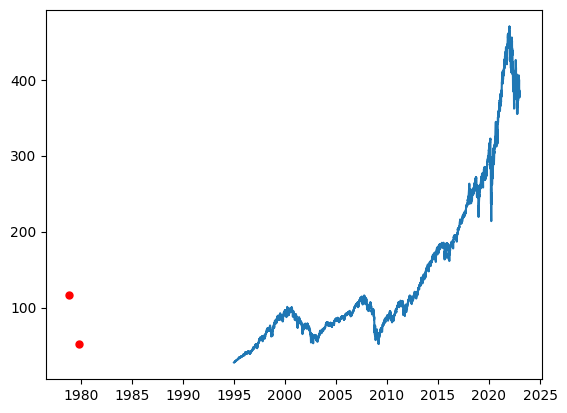

In [16]:
DRAWDOWN_DURATION("SPY",'1995-1-1','2022-12-31')

91.732292
164.20546
2022-10-24 00:00:00
2020-08-04 00:00:00
811 days


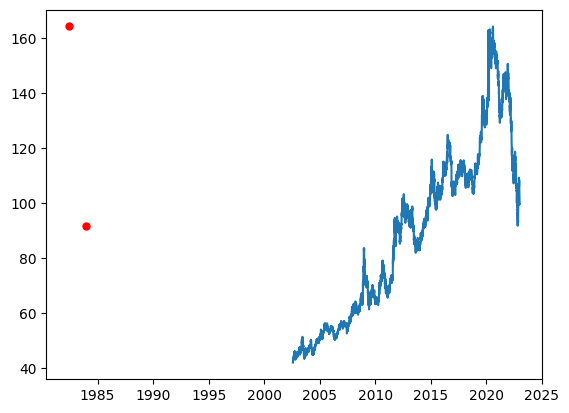

In [17]:
DRAWDOWN_DURATION("TLT",'1995-1-1','2022-12-31')

100.5
184.589996
2015-12-17 00:00:00
2011-08-22 00:00:00
1578 days


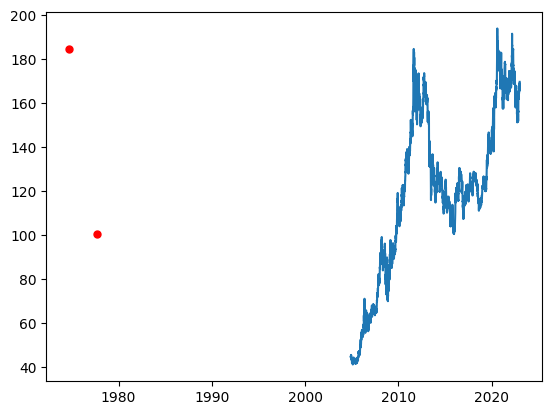

In [18]:
DRAWDOWN_DURATION("GLD",'1995-1-1','2022-12-31')

9.14
80.860001
2017-11-03 00:00:00
2008-11-20 00:00:00
3270 days


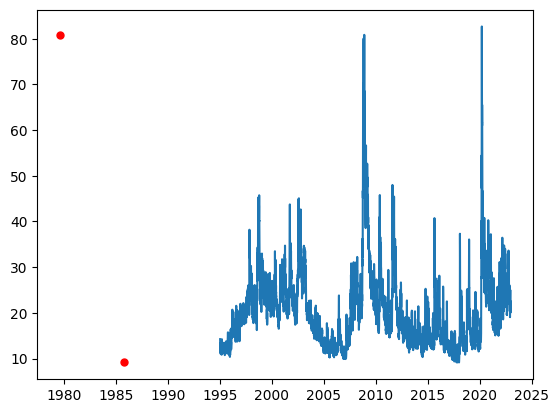

In [19]:
DRAWDOWN_DURATION("^VIX",'1995-1-1','2022-12-31')

-37.63
123.7
2020-04-20 00:00:00
2022-03-08 00:00:00
-687 days


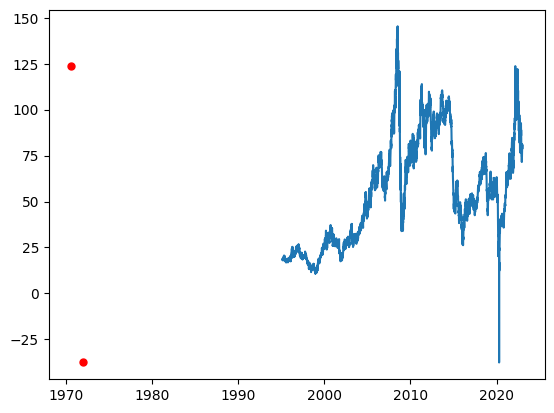

In [20]:
DRAWDOWN_DURATION("CL",'1995-2-14','2022-12-31')

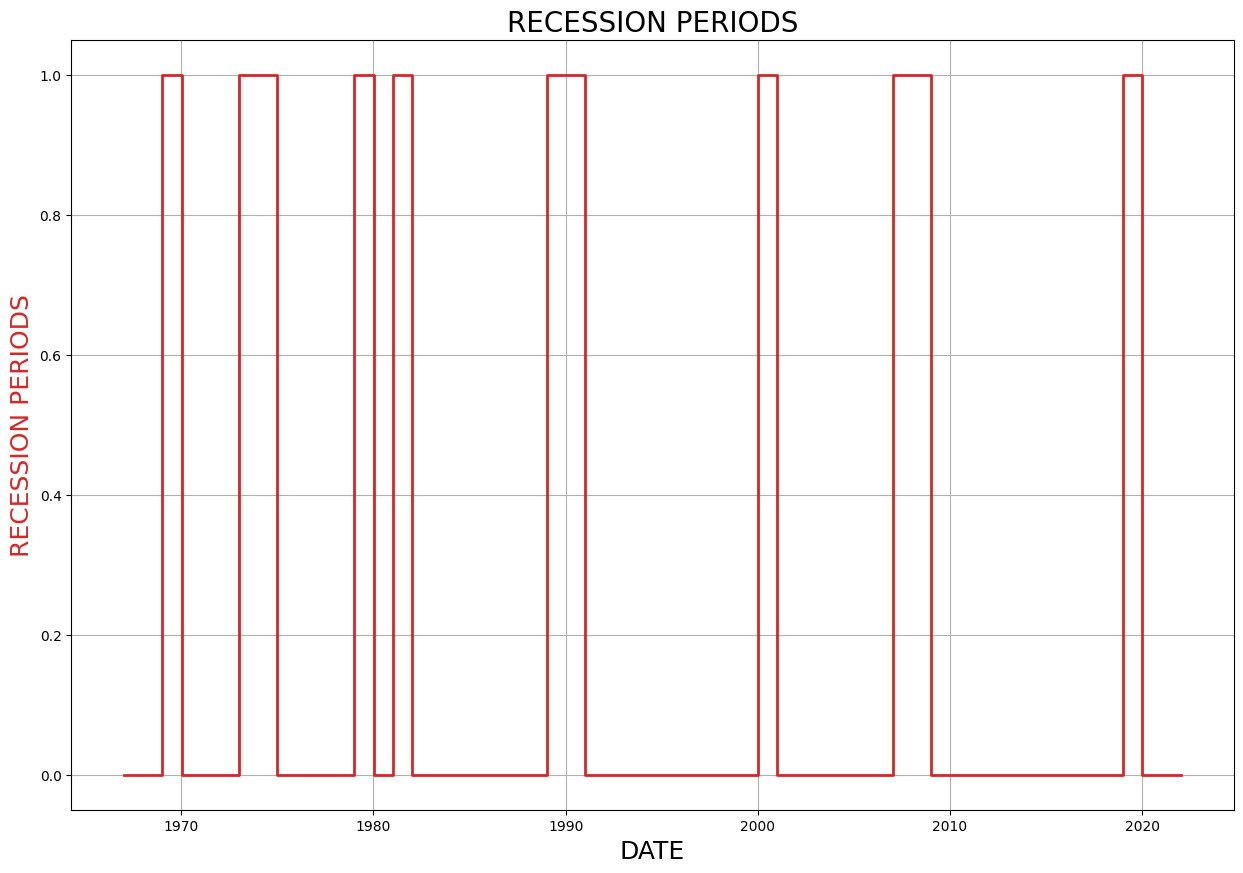

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
from datetime import date


def plotrecessionPeriod(name):
    df = pd.read_csv("C:/Users/hsahn/Downloads/"+name+".csv")
    df['DATE'] = pd.to_datetime(df['DATE'])
#     stock_data = df.set_index('Date')
    
    fig, ax1 = plt.subplots(figsize=(15, 10)) 
    color = 'tab:red'
    ax1.set_xlabel('DATE', fontsize=18) 
    ax1.set_ylabel('RECESSION PERIODS', color=color, fontsize=18)
    ax1.step(df['DATE'],df['JHDUSRGDPBR'], color=color, linewidth=2) 
#     plt.text(0.05, 0.95, text, transform=ax1.transAxes, ha='left', va='top', fontsize=12, color='black')
    plt.title('RECESSION PERIODS', fontsize=20, color='black')
    ax1.grid(True)
    plt.show()
    
plotrecessionPeriod("recession")

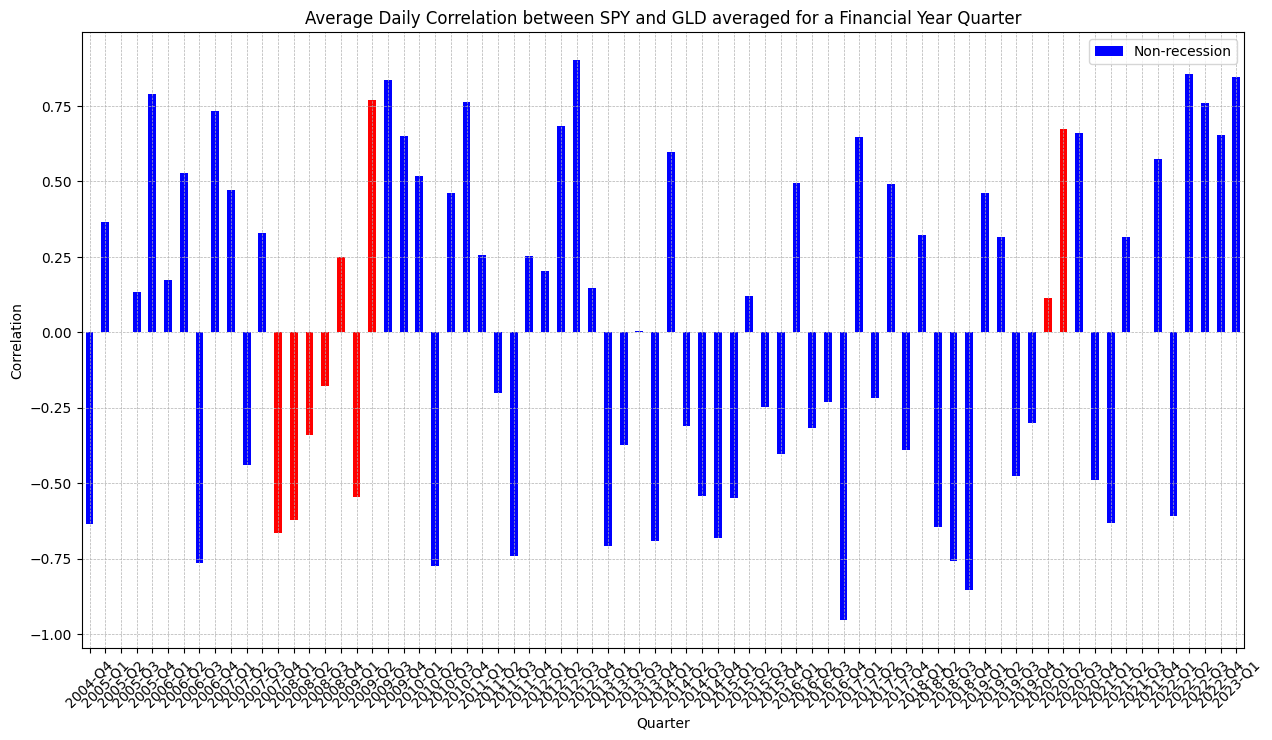

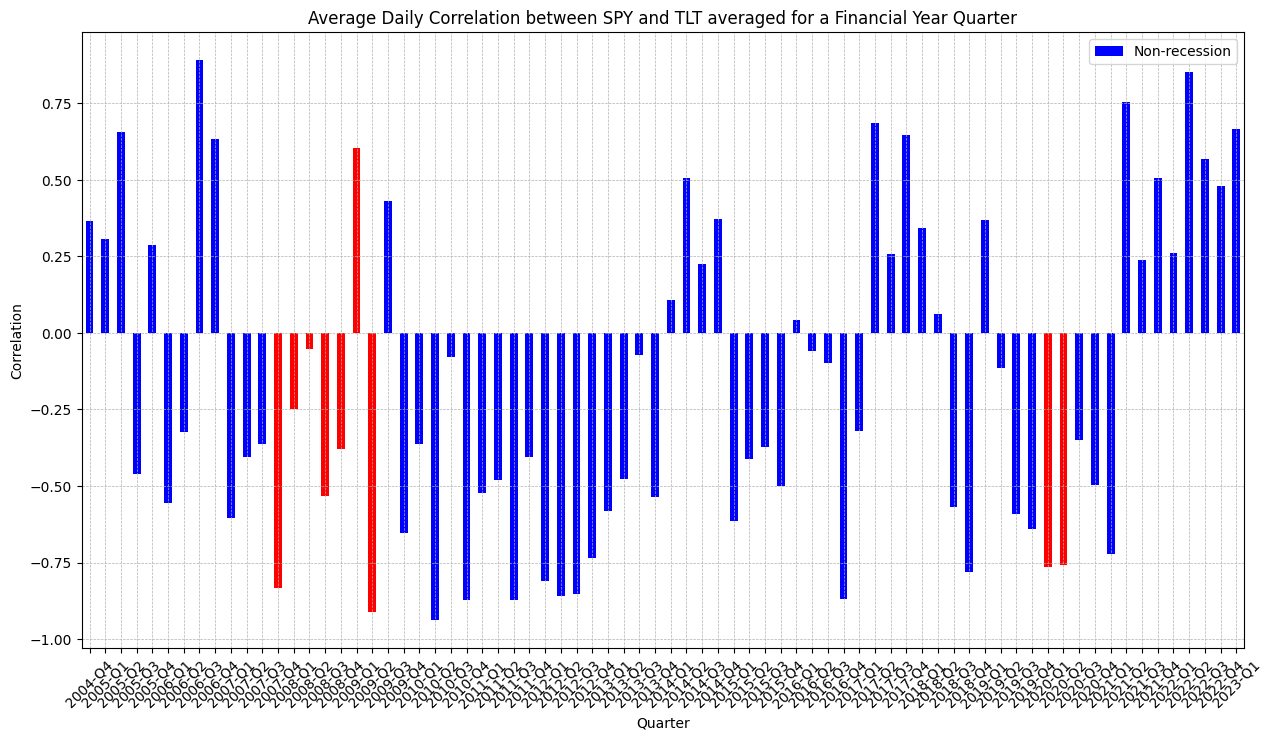

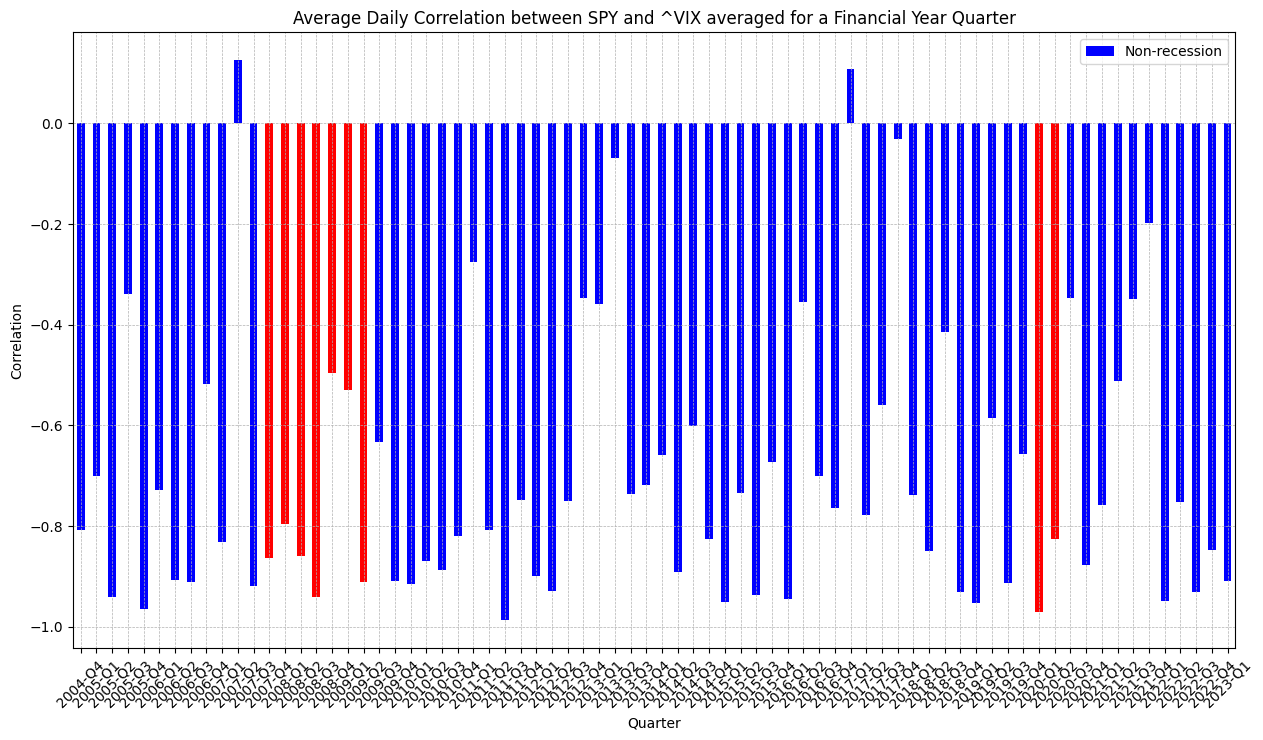

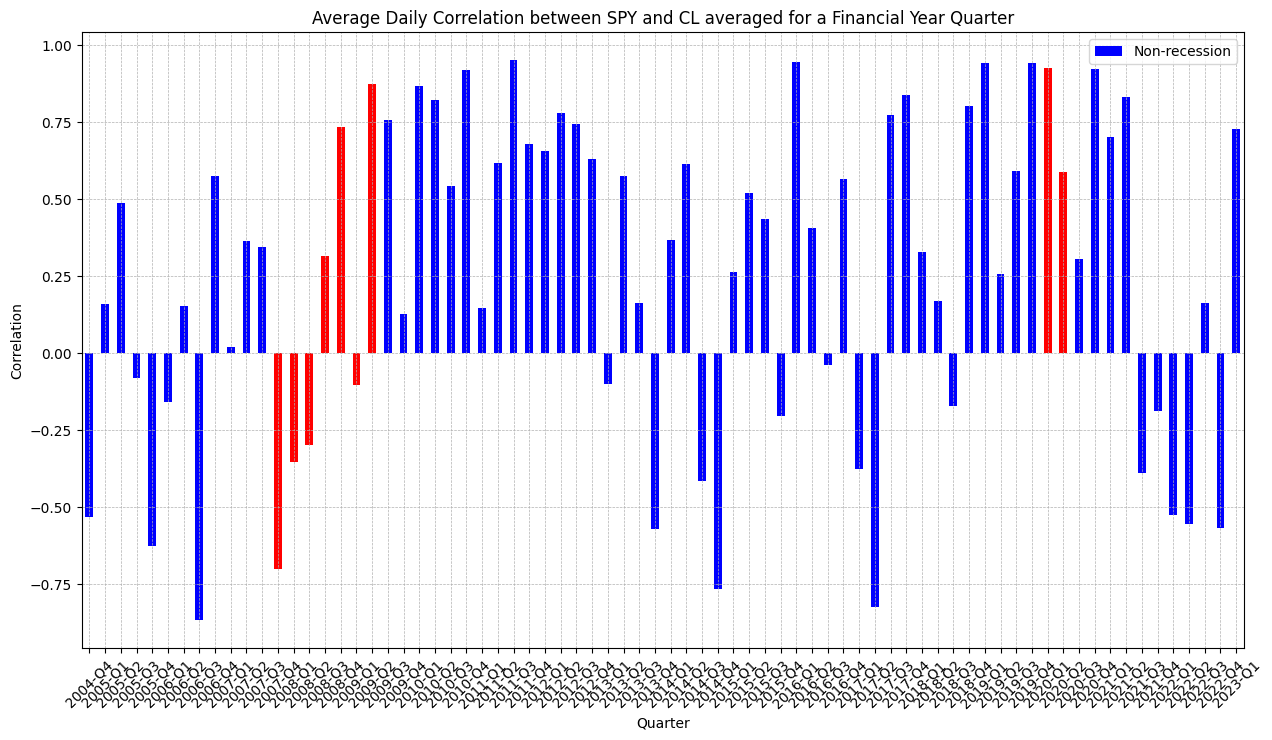

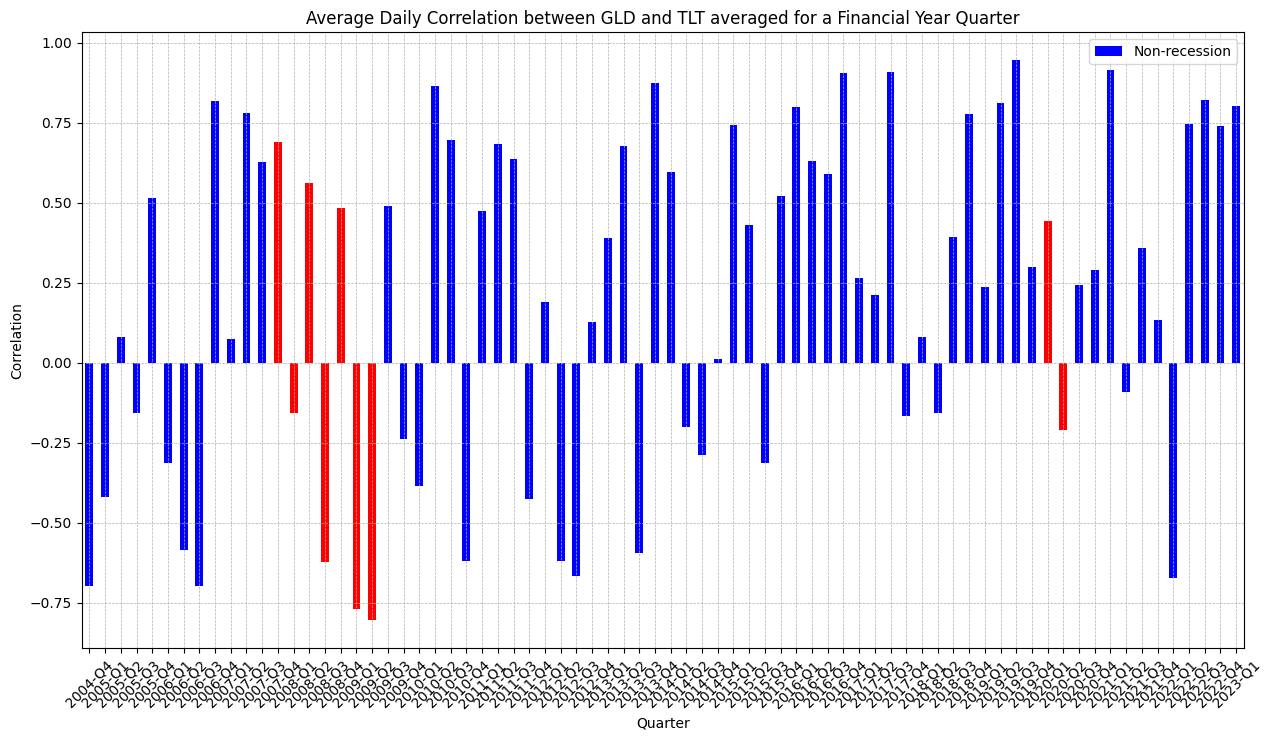

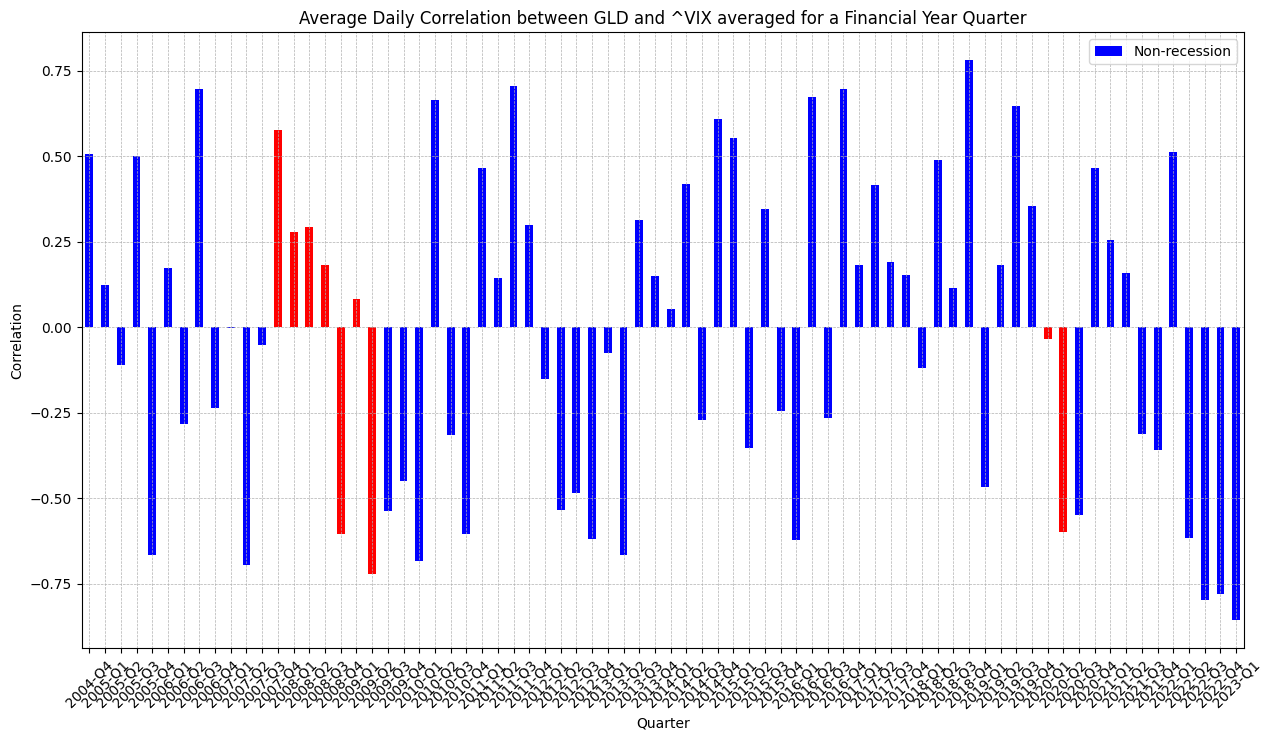

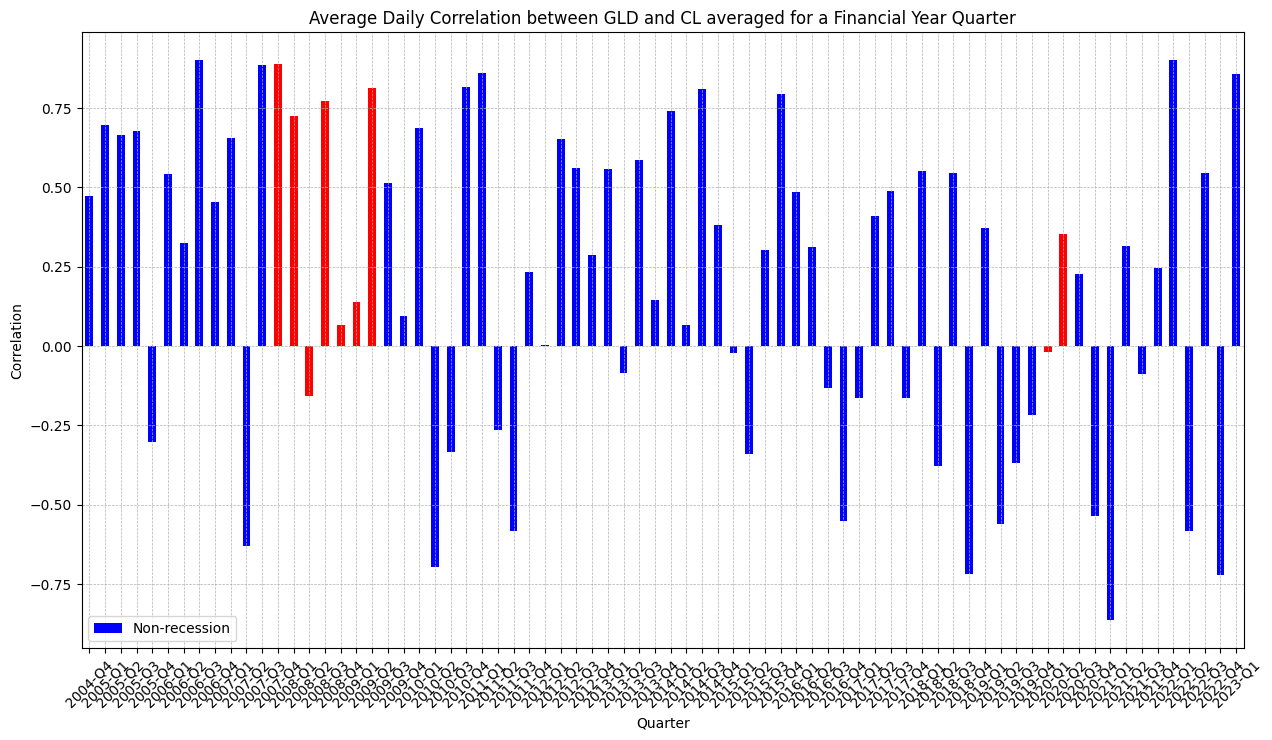

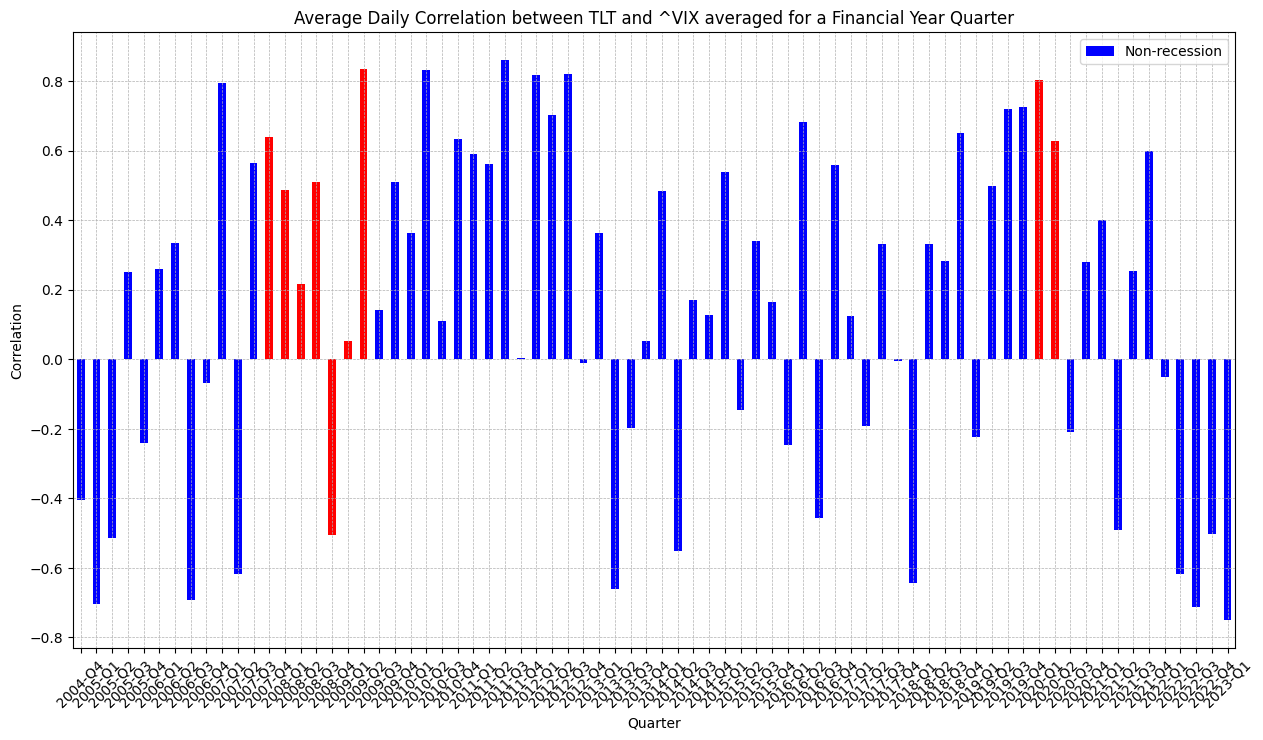

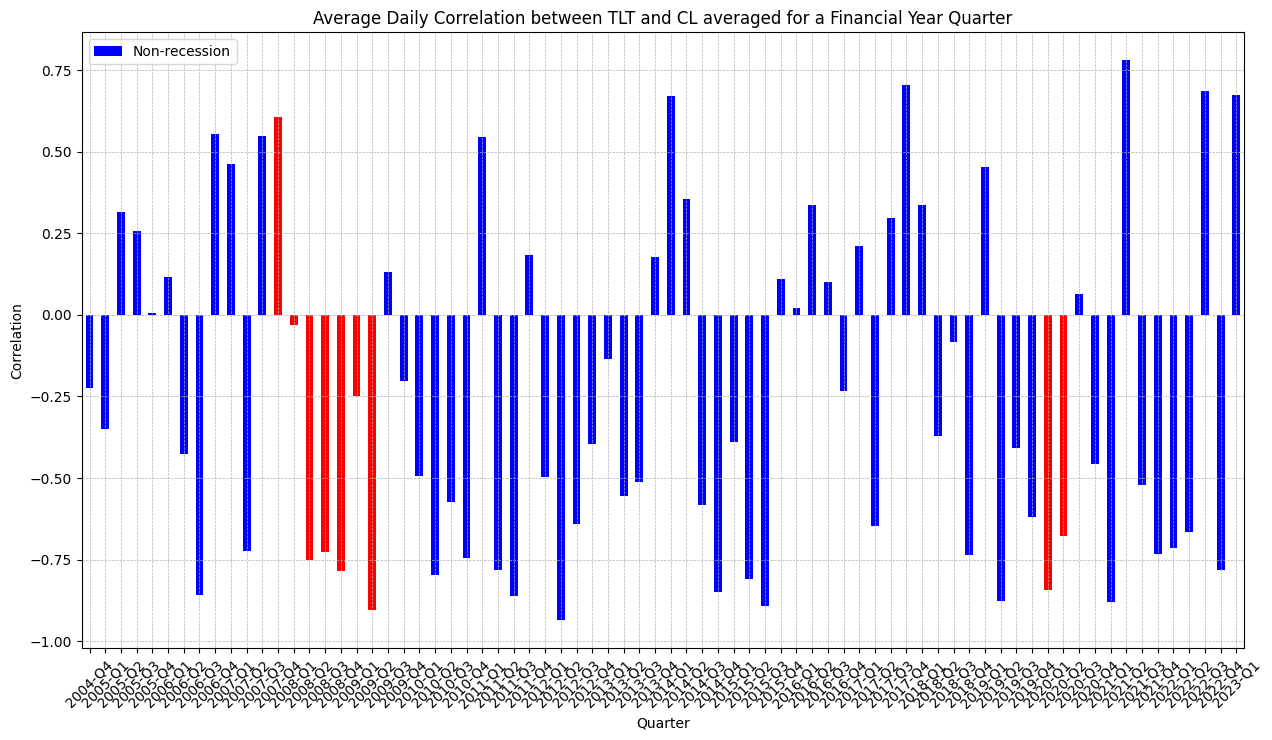

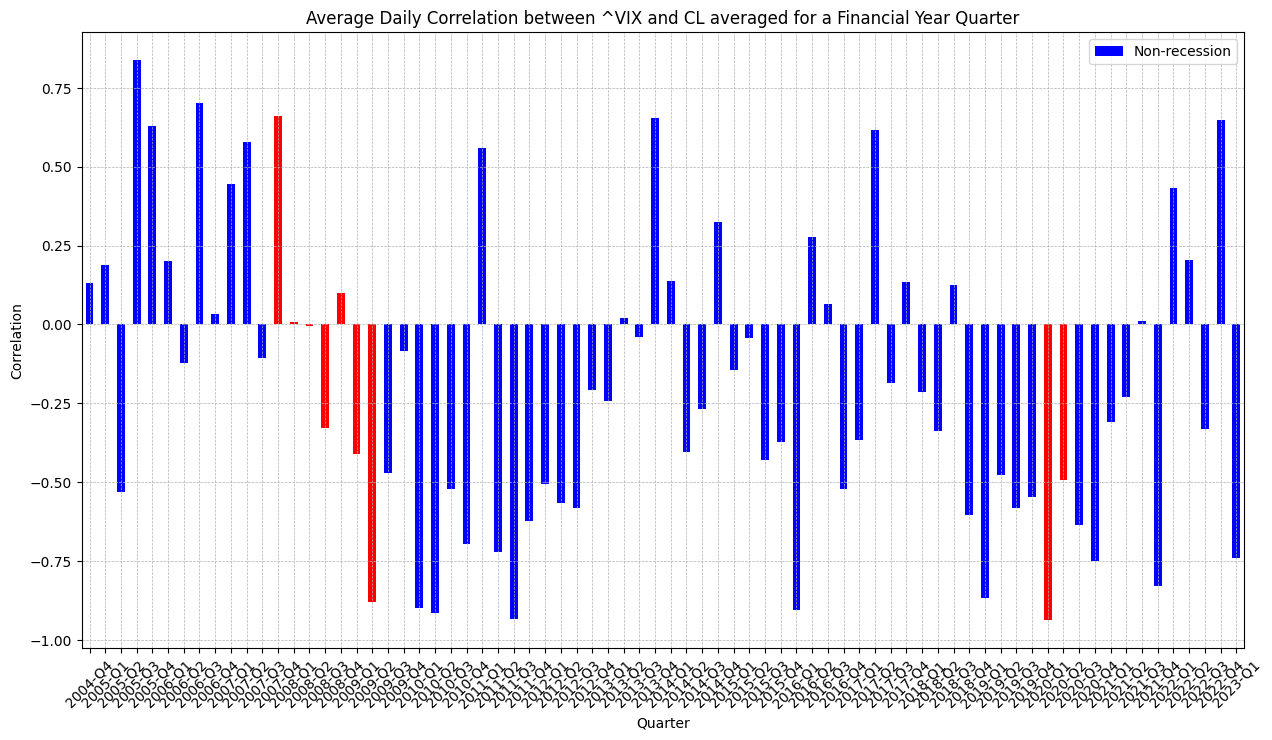

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

import itertools
import datetime as dt
from datetime import timedelta as td
import pandas as pd
import numpy as np 
from datetime import date

asset_classes = ['SPY', 'GLD', 'TLT', '^VIX', 'CL']

# Generating all pairs of asset classes
asset_pairs = list(itertools.combinations(asset_classes, 2))

dfs = []
for asset_class in asset_classes:
    filename = "C:/Users/hsahn/Downloads/"+asset_class+".csv"
    df = pd.read_csv(filename, usecols=['Date', 'Adj Close'], parse_dates=['Date'], dayfirst=True)
    df = df.rename(columns={'Adj Close': f'{asset_class}'})
    dfs.append(df)

# Merge dfs on Date column
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Date', how='inner')
merged_df['Date'] = pd.to_datetime(merged_df['Date'], format='%d-%m-%Y')

# Define financial year quarters
def get_fin_quarter(date):
    if date.month >= 1 and date.month <= 3:
        return f'{date.year}-Q1'
    elif date.month >= 4 and date.month <= 6:
        return f'{date.year}-Q2'
    elif date.month >= 7 and date.month <= 9:
        return f'{date.year}-Q3'
    else:
        return f'{date.year}-Q4'

# Create new column with financial year quarter
merged_df['FinQuarter'] = merged_df['Date'].apply(get_fin_quarter)
# merged_df.to_csv('merged.csv', index=False)

# Read recession data
recession_df = pd.read_csv("C:/Users/hsahn/Downloads/recession.csv", parse_dates=['DATE'], dayfirst=True)
recession_df['FinQuarter'] = recession_df['DATE'].apply(get_fin_quarter)

corr_df = pd.DataFrame()
for asset_pair in asset_pairs:
    asset1, asset2 = asset_pair
    corr_series = merged_df.groupby('FinQuarter')[[asset_pair[0], asset_pair[1]]].corr().iloc[0::2,-1]
    corr_series.name = f'{asset_pair[0]} vs {asset_pair[1]}'
    
# Join with recession data
    merged_corr_recession = pd.merge(corr_series.to_frame(), recession_df, on='FinQuarter', how='left')
    merged_corr_recession['JHDUSRGDPBR'] = merged_corr_recession['JHDUSRGDPBR'].fillna(0)
    
    
    
    # Plot the bar graph
    merged_corr_recession['color_label'] = merged_corr_recession['JHDUSRGDPBR'].apply(lambda x: 'Recession' if x==1 else 'Non-recession')
    ax = merged_corr_recession.plot(x='FinQuarter', y=corr_series.name, kind='bar', color=merged_corr_recession['JHDUSRGDPBR'].apply(lambda x: 'red' if x==1 else 'blue'))

#     ax = merged_corr_recession.plot(x='FinQuarter', y=corr_series.name, kind='bar', color=merged_corr_recession['JHDUSRGDPBR'].apply(lambda x: 'red' if x==1 else 'blue'))
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Correlation')
    ax.set_title(f'Average Daily Correlation between {asset1} and {asset2} averaged for a Financial Year Quarter')
    plt.xticks(rotation=45)
    legend_labels = ['Non-recession','Recession']
    ax.legend(handles=ax.containers, labels=legend_labels)
    ax.grid(linewidth=0.5, linestyle='--')

    plt.gcf().set_size_inches(15, 8)
    plt.show()    